In [2]:
#general code to simulate SRS that is used for several exercises later

type SRS
    F::Function #X_t+1 = F(X_t,W_t+1) where W~phi
    phi::Function #returns a random number according to some distribution phi
    x::Float64 #current state
end

function update(srs::SRS)
    srs.x = srs.F(srs.x,srs.phi())
end

function sample_path(srs::SRS,T)
    path = Array(Float64,T)
    for t in 1:T
        path[t] = srs.x
        update(srs)
    end
    return path
end


sample_path (generic function with 1 method)

In [27]:
#ex 6.1.4
type SRSint
    F::Function
    phi::Function
    x::Int64
end

function update(srs::SRSint)
    srs.x = srs.F(srs.x,srs.phi())
end

function sample_path(srs::SRSint,T)
    path = Array(Int64,T)
    for t in 1:T
        path[t] = srs.x
        update(srs)
    end
    return path
end

function makeF(p::Matrix{Float64})
    S = 1:size(p,1)
    function F(x::Int64,z::Float64)
        a = 0.0
        for y in S
            if a<z<=a+p[x,y] 
                return y
            else
                a += p[x,y]
            end
        end
    end
    return F
end

pH = [0.971 0.029 0.0; 0.145 0.778 0.077; 0.0 0.508 0.492]
FH = makeF(pH)

srsH = SRSint(FH,rand,1)
pathH = sample_path(srsH,10000)
hist(pathH)[2]/10000
    

3-element Array{Float64,1}:
 0.8347
 0.1482
 0.0171

In [26]:
#ex 6.1.5
using Distributions
const alpha, k0, delta, s, sig2 = 0.3, 1.0, 0.1, 0.5, 0.2
F(k,W) = s*W*k^alpha+(1-delta)*k
phi = LogNormal(0.0,sqrt(sig2))
d() = rand(phi)
solow_srs = SRS(F,d,k0)

X = Array(Float64,1000)
for j in 1:1000
    X[j] = sample_path(solow_srs,20)[end]
    solow_srs.x=k0
end
mean(X), var(X)


(8.120166921612745,1.472777797609233)

In [27]:
#ex 6.1.6
using Distributions
const alpha, k0, delta, s, sig2 = 0.3, 1.0, 0.1, 0.75, 0.2
F(k,W) = s*W*k^alpha+(1-delta)*k
phi = LogNormal(0.0,sqrt(sig2))
d() = rand(phi)
solow_srs = SRS(F,d,k0)

X = Array(Float64,1000)
for j in 1:1000
    X[j] = sample_path(solow_srs,20)[end]
    solow_srs.x=k0
end
mean(X)

14.208413881660634

In [28]:
#ex 6.1.7
using Distributions
const alpha, delta, s, sig2 = 0.3, 0.1, 0.5, 0.2

for start in 5:5:20
    F(k,W) =s* W*k^alpha+(1-delta)*k
    phi = LogNormal(0.0,sqrt(sig2))
    d() = rand(phi)
    solow_srs = SRS(F,d,start)

    X = Array(Float64,1000)
    for j in 1:1000
        X[j] = sample_path(solow_srs,20)[end]
        solow_srs.x=start
    end
    println(mean(X))
end

9.673931528988572
11.091685445259097
12.236488280295806
13.445436231625747


In [29]:
#ex 6.1.8
using Distributions
const alpha, k0, delta, s, sig2 = 0.3, 1.0, 0.1, 0.5, 0.2
F(k,W) = s*W*k^alpha+(1-delta)*k
phi = LogNormal(0.0,sqrt(sig2))
d() = rand(phi)
solow_srs = SRS(F,d,k0)

X = Array(Float64,1000)
for endtime in 50:50:200
    for j in 1:1000
        X[j] = sample_path(solow_srs,endtime)[end]
        solow_srs.x=k0
    end
    println(mean(X))
end

11.044332514523783
11.426707286075974
11.459512769407509
11.520915809710159


In [30]:
#ex 6.1.9
using Distributions
const alpha, k0, delta, s, sig2 = 0.3, 1.0, 0.1, 0.5, 0.2
F(k,W) = s*W*k^alpha+(1-delta)*k
phi = LogNormal(0.0,sqrt(sig2))
d() = rand(phi)
solow_srs = SRS(F,d,k0)

for start in 5:5:20
    F(k,W) = s*W*k^alpha+(1-delta)*k
    phi = LogNormal(0.0,sqrt(sig2))
    d() = rand(phi)
    solow_srs = SRS(F,d,start)

    X = Array(Float64,1000)
    for j in 1:1000
        X[j] = sample_path(solow_srs,200)[end]
        solow_srs.x=start
    end
    println(mean(X))
end

11.376601061006241
11.502952952248423
11.43219551575681
11.441790780284412


maximum at 0.

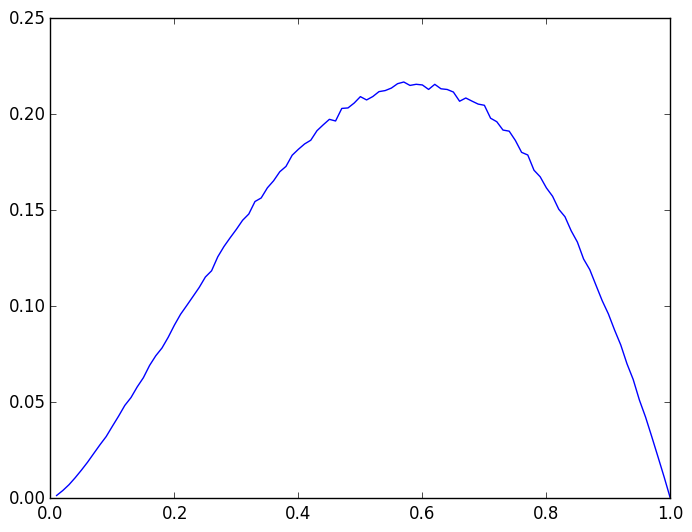

57


In [31]:
#ex 6.1.11
using Distributions
using PyPlot
const alpha, k0, delta, sig2 = 0.3, 1.0, 1.0, 0.2

C100 = Array(Float64,100)

for i in 1:100
    F(k,W) = (i/100)*W*k^alpha+(1-delta)*k
    phi = LogNormal(0.0,sqrt(sig2))
    d() = rand(phi)
    solow_srs = SRS(F,d,k0)
    X = Array(Float64,5000)
    for j in 1:5000
        X[j] = sample_path(solow_srs,100)[end]
        solow_srs.x=k0
    end
    C100[i]=(1-i/100)*mean(X)
end

plot((1:100)/100,C100)
println("maximum at ",findmax(C100)[2]/100)

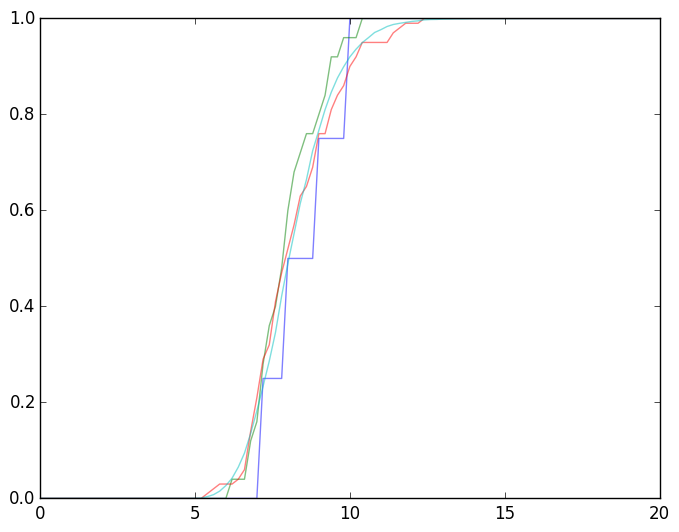

In [33]:
#ex 6.1.12
using PyPlot
function ECDF(data::Vector{Float64})
    function F(x::Float64)
        sum(data.<= x)/length(data)
    end
    function F(X::Vector{Float64})
        return [F(x) for x in X]
    end
    function F(X::FloatRange{Float64})
        return [F(x) for x in X]
    end
    return F
end

function plotECDF(data::Vector{Float64},a::Float64,b::Float64)
    F = ECDF(data)
    xgrid = a:(b-a)/100:b
    ygrid = F(xgrid)
    return plot(xgrid,ygrid,alpha=0.5)
end

using Distributions
const alpha, k0, delta, s, sig2 = 0.3, 1.0, 0.1, 0.5, 0.2
F(k,W) = s*W*k^alpha+(1-delta)*k
phi = LogNormal(0.0,sqrt(sig2))
d() = rand(phi)
solow_srs = SRS(F,d,k0)

for n in [4,25,100,5000]
    X = Array(Float64,n)
    for j in 1:n
        X[j] = sample_path(solow_srs,20)[end]
        solow_srs.x=k0
    end
    plotECDF(X,0.0,20.0)
end


    

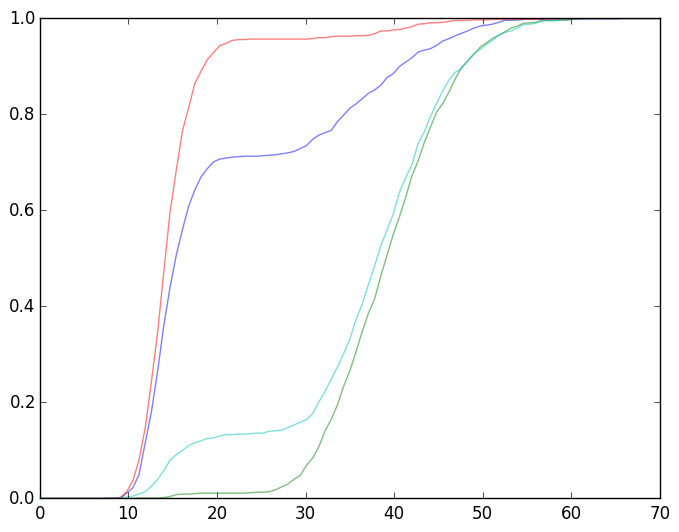

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fda2a6ac110>

In [24]:
#ex 6.1.13 (uses 6.1.12)
const alpha, delta, s, sig2 = 0.5, 1.0, 0.25, 0.02
function createF(kb::Float64,A1::Float64,A2::Float64)
    function F(k,W)
        if k<kb
            return s*A1*W*k^alpha+(1-delta)*k
        else
            return s*A2*W*k^alpha+(1-delta)*k
        end
    end
    return F
end
phi = LogNormal(0.0,sqrt(sig2))
d() = rand(phi)
solow_thresh1a = SRS(createF(21.6,15.0,25.0),d,1.0)
solow_thresh80a = SRS(createF(21.6,15.0,25.0),d,80.0)
solow_thresh1b = SRS(createF(24.1,15.0,25.0),d,1.0)
solow_thresh80b = SRS(createF(24.1,15.0,25.0),d,80.0)


X1a = Array(Float64,1000)
X80a = Array(Float64,1000)
X1b = Array(Float64,1000)
X80b = Array(Float64,1000)
for j in 1:1000
    X1a[j] = sample_path(solow_thresh1a,100)[end]
    solow_thresh1a.x = 1.0
    X80a[j] = sample_path(solow_thresh80a,100)[end]
    solow_thresh80a.x = 80.0
    X1b[j] = sample_path(solow_thresh1b,100)[end]
    solow_thresh1b.x = 1.0
    X80b[j] = sample_path(solow_thresh80b,100)[end]
    solow_thresh80b.x = 80.0
end
    
plotECDF(X1a,0.0,70.0)
plotECDF(X80a,0.0,70.0)
plotECDF(X1b,0.0,70.0)
plotECDF(X80b,0.0,70.0)


In [25]:
#ex 6.1.14 (uses 6.1.13)
tvalues1a = zeros(Int64,5000)

for n in 1:5000
    solow_thresh1a.x=1.0
    count = 0
    while solow_thresh1a.x<21.6
        update(solow_thresh1a)
        count += 1
    end
    tvalues1a[n] = count
end
println(mean(tvalues1a))

tvalues1b = zeros(Int64,5000)
for n in 1:5000
    solow_thresh1b.x=1.0
    count = 0
    while solow_thresh1b.x<24.1
        update(solow_thresh1b)
        count += 1
    end
    tvalues1b[n] = count
end
println(mean(tvalues1b))

261.586
2153.4422


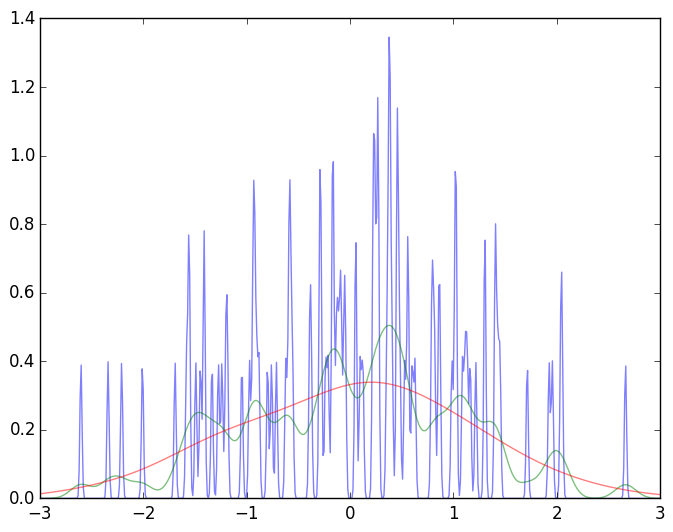

In [8]:
#ex 6.1.17 (Parzen windows)
using Distributions
using PyPlot

function pwn(x::Float64,data::Vector{Float64},bw::Float64)
    result = 0.0
    for y in data
        result += pdf(Normal(),(x-y)/bw)
    end
    return result/(bw*length(data))
end

function pwn(x::FloatRange{Float64},data::Vector{Float64},bw::Float64)
    out = Array(Float64,length(x))
    for (n,i) in enumerate(x)
       out[n]=pwn(i,data,bw)
    end
    return out
end

data = randn(100)
grid = -3.0:0.01:3.0
for bw in [0.01,0.1,0.5]
    plot(grid,pwn(grid,data,bw),alpha=0.5,label="bandwidth = $bw")
end
    

Array{

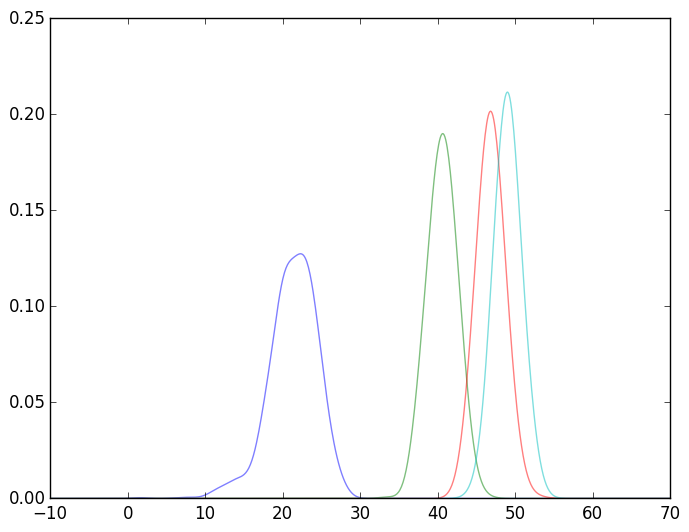

Float64,1}


In [19]:
# ex. 6.1.19
using Distributions
using PyPlot

G(x) = cdf(Normal(),x)
g(x) = (1.0+0.4*x)*(1.0-G(x))+(10.0+0.8*x)G(x)
F(x,W) = g(x)+W

star = SRS(F,randn,randn())
data5 = Array(Float64,1000)
data10 = Array(Float64,1000)
data15 = Array(Float64,1000)
data20 = Array(Float64,1000)
for i in 1:1000
    path = sample_path(star,20)
    data5[i] = path[4]
    data10[i] = path[9]
    data15[i] = path[14]
    data20[i] = path[19]
    star.x = randn()
end

function lae(y::Float64,p::Function,data::Vector{Float64})
    out = 0.0
    for x in data
        out+=p(x,y)
    end
    return out/length(data)
end

function lae(y::Array{Float64},p::Function,data::Vector{Float64})
    out = Array(Float64,length(y))
    for (i,yi) in enumerate(y)
        out[i] = lae(yi,p,data)
    end
    return out
end

function lae(y::FloatRange{Float64},p::Function,data::Vector{Float64})
    out = Array(Float64,length(y))
    for (i,yi) in enumerate(y)
        out[i] = lae(yi,p,data)
    end
    return out
end

p(x,y) = pdf(Normal(),y-x)
grid = -10:0.1:70

for data in (data5,data10,data15,data20)
    plot(grid,lae(grid,p,data),alpha=0.5)
end



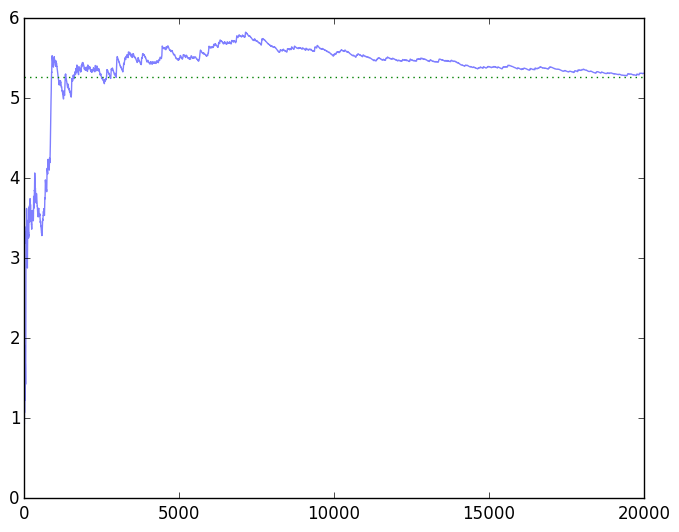

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcefe577610>

In [23]:
#ex 6.1.20
using PyPlot

const a = 0.9
F(x,W) = a*x+W
srs = SRS(F,randn,randn())
X = sample_path(srs,20000)
X2 = X.^2
X2c = [mean(X2[1:i]) for i in 1:length(X2)]
plot(1:length(X2c),X2c,alpha=0.5)
plot([1,length(X2c)],[1/(1-a^2),1/(1-a^2)],"g:")

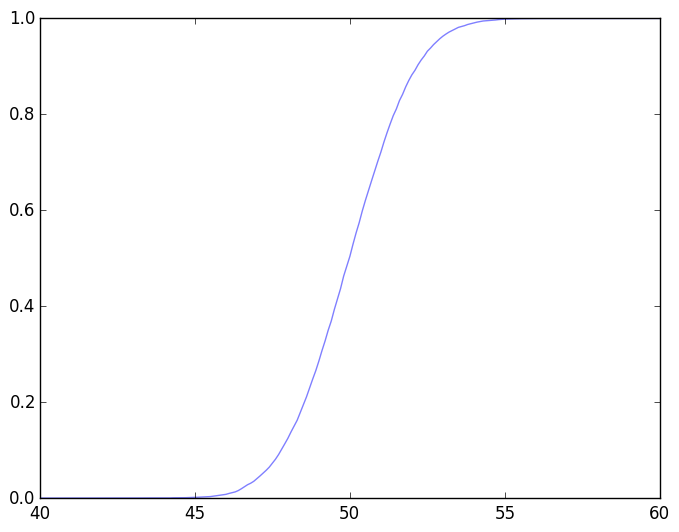

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcefe3202d0>

In [33]:
#ex 6.2.21
using PyPlot
using Distributions

function Fn(x::Float64,X::Vector{Float64})
    return mean(X.<=x)
end

function Fn(x::FloatRange{Float64},X::Vector{Float64})
    out = Array(Float64,length(x))
    for (i,xi) in enumerate(x)
        out[i] = Fn(xi,X)
    end
    return out
end

G(x) = cdf(Normal(),x)
g(x) = (1.0+0.4*x)*(1.0-G(x))+(10.0+0.8*x)G(x)
F(x,W) = g(x)+W

star = SRS(F,randn,randn())
sample = sample_path(star,10000)

grid = 40:0.1:60
plot(grid,Fn(grid,sample),alpha=0.5)


In [3]:
# ex 6.1.22 (look ahead density estimation)
using PyPlot
using Distributions

function lade(y::Float64,p::Function,X::Vector{Float64})
    mean([p(x,y) for x in X])
end

function lade(y::FloatRange,p::Function,X::Vector{Float64})
    out = Array(Float64,length(y))
    for (i,yi) in enumerate(y)
        out[i] = lade(yi,p,X)
    end
    return out
end

function lade(y::Array{Float64},p::Function,X::Vector{Float64})
    out = Array(Float64,length(y))
    for (i,yi) in enumerate(y)
        out[i] = lade(yi,p,X)
    end
    return out
end

lade (generic function with 3 methods)

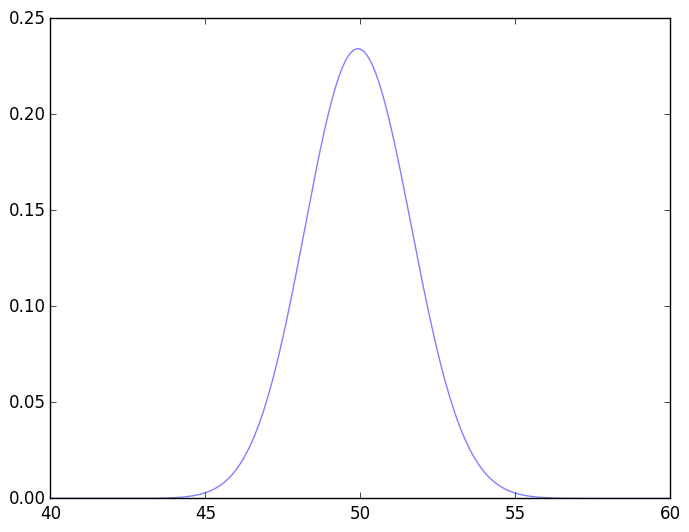

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3e9b971bd0>

In [3]:
# ex 6.1.22 (continued)
G(x) = cdf(Normal(),x)
g(x) = (1.0+0.4*x)*(1.0-G(x))+(10.0+0.8*x)G(x)
F(x,W) = g(x)+W
p(x,y) = pdf(Normal(),y-g(x))

star = SRS(F,randn,randn())
sample = sample_path(star,10000)

grid = 40:0.1:60
plot(grid,lade(grid,p,sample),alpha=0.5)

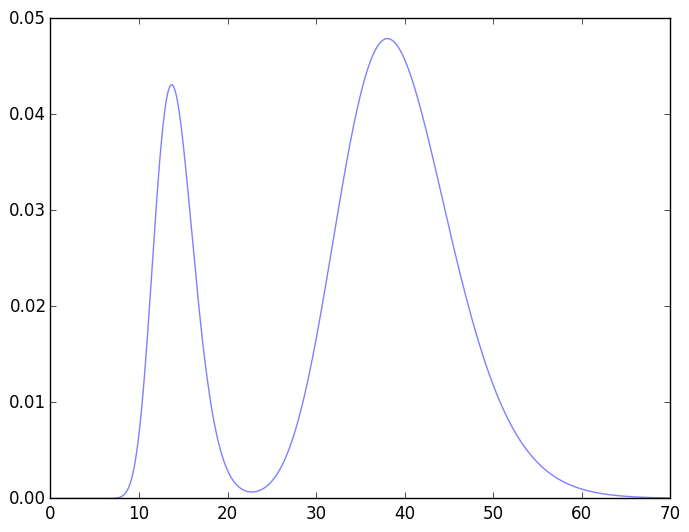

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcefde7a1d0>

In [45]:
# ex 6.1.23 (requires 6.1.22)
const alpha, delta, s, sig2 = 0.5, 1.0, 0.25, 0.02
function createF(kb::Float64,A1::Float64,A2::Float64)
    function F(k,W)
        if k<kb
            return s*A1*W*k^alpha+(1-delta)*k
        else
            return s*A2*W*k^alpha+(1-delta)*k
        end
    end
    return F
end
phi = LogNormal(0.0,sqrt(sig2))
d() = rand(phi)
solow_thresh = SRS(createF(22.81,15.0,25.0),d,22.81)
path = sample_path(solow_thresh,100000)
A(x)= x<=22.81 ? 15.0 : 25.0
p(x,y)=pdf(LogNormal(0.0,sqrt(sig2)),y/(s*A(x)*x^alpha))/(s*A(x)*x^alpha)

grid = 0:0.1:70
plot(grid,lade(grid,p,path),alpha=0.5)

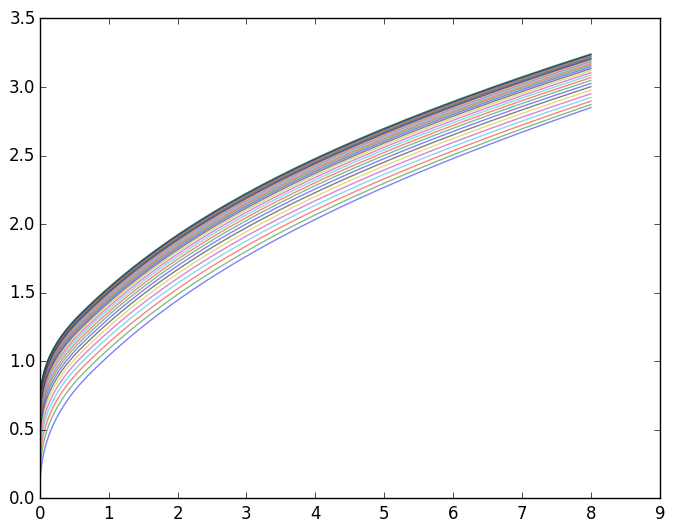

In [27]:
# ex 6.2.2
using PyPlot
using Distributions
using Interpolations: interpolate,Gridded,Linear
using Optim: optimize

const theta, alpha ,rho = 0.5, 0.8, 0.9
U(c) = 1- e^(-theta*c)
f(k,z) = z*k^alpha

phi(z) = pdf(LogNormal(),z)
const weights = rand(LogNormal(),1000)

const gridmax, gridlength = 8.0,150
const grid = linspace(0.0001,gridmax^1e-1,gridlength).^10
const start = sqrt(grid)
const Ustart = interpolate((grid,),start,Gridded(Linear()))#square root function as starting value

function bellman(w::Interpolations.GriddedInterpolation)
    vals = Array(Float64,length(grid))
    for (i,y) in enumerate(grid)
        #objective(k) = -U(y-k) - rho*quadgk(z -> w[f(k,z)]*phi(z),0.0,30.0)[1]#to speed up calc, integral only to 30 not to Inf
        objective(k) = -U(y-k) - rho*mean([w[f(k,z)] for z in weights])
        vals[i] = -optimize(objective,0.0,y).f_minimum
    end
    return interpolate((grid,),vals,Gridded(Linear()))
end

#err = 1.0
#tol = 0.05
#w_old = bellman(Ustart)
#while err>tol
#    w_new = bellman(w_old)
#    err = maximum(abs(w_new-w_old))
#    w_old = w_new
#end

const niter = 30
W = Array(Float64,niter,gridlength)
w_old = bellman(Ustart)
for i in 1:niter
    W[i,1:end]=w_old[grid]
    w_old = bellman(w_old)
end

for i in 1:niter
    plot(grid,vec(W[i,1:end]),alpha=0.5)
end


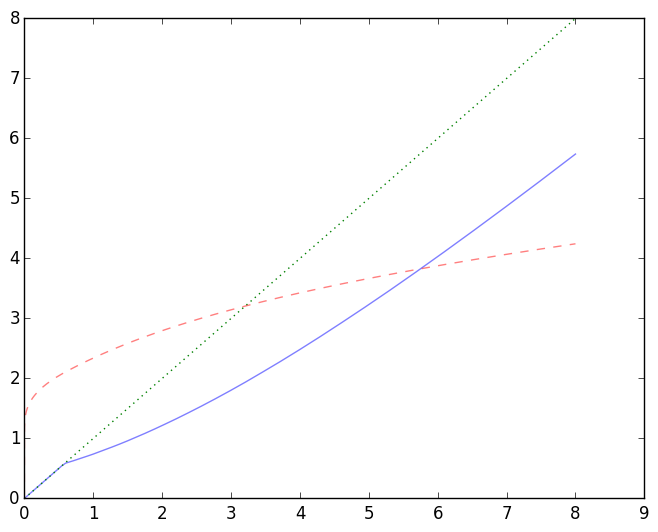

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5e7ae430d0>

In [28]:
# ex 6.2.2 (continued)
function optimal_policy(w::Interpolations.GriddedInterpolation)
    pol = Array(Float64,gridlength)
    for (i,y) in enumerate(grid)
        objective(k) = -U(y-k) - rho*mean([w[f(k,z)] for z in weights])
        pol[i] = optimize(objective,0.0,y).minimum
    end
    return pol
end

opt_pol = optimal_policy(w_old)
plot(grid,opt_pol,"b-",alpha=0.5,label="policy")
plot([0.0,gridmax],[0.0,gridmax],"g:",label="45 degrees")
plot(grid, [f(w_old[i],mean(weights)) for i in grid],"r--",alpha=0.5,label="capital")

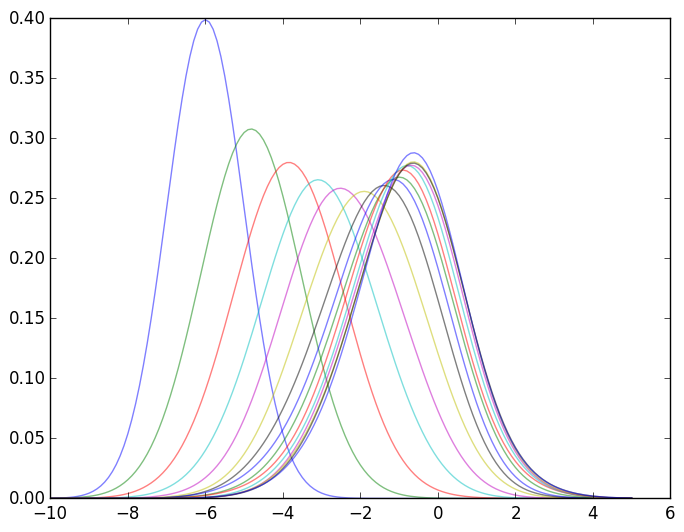

In [34]:
# ex. 6.2.2 (continued, required ex. 6.1.22)
const x0 = -7.5
const n = 1000
sig = interpolate((grid,),opt_pol,Gridded(Linear()))
g(x) = alpha*log(sig[e^x])
p(x,y) = pdf(Normal(),y-g(x))
F(x,W) = g(x)+W

srs = SRS(F,randn,x0)
logdata = Array(Float64,1000,15)
for j in 1:n
    logdata[j,1:end] = sample_path(srs,15)
    srs.x = x0
end

data = e.^logdata

for t in 1:15
    plot(-10:0.1:5.0,lade(-10:0.1:5.0,p,vec(logdata[1:end,t])),alpha=0.5)
end

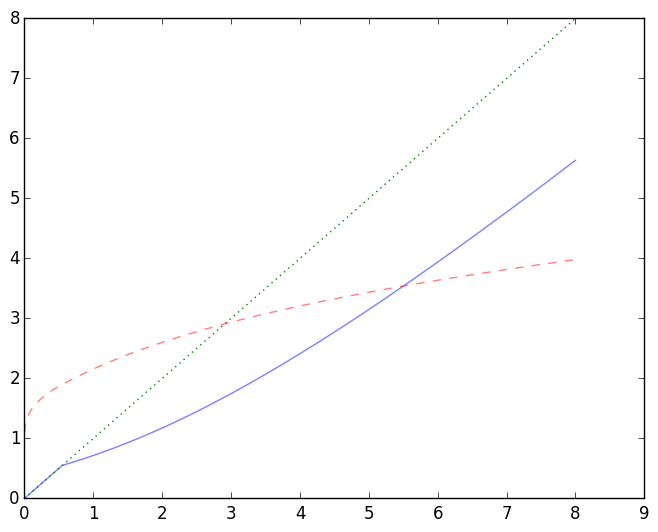

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f69c8780550>

4.538661 seconds (1.66 M allocations: 227.070 MB, 0.48% gc time)


In [1]:
#ex 6.2.4
using Optim: optimize
using Distributions
using PyPlot
using Interpolations: interpolate,Gridded,Linear

const theta, alpha ,rho = 0.5, 0.8, 0.9
U(c) = 1- e^(-theta*c)
f(k,z) = z*k^alpha

phi(z) = pdf(LogNormal(),z)
const weights = rand(LogNormal(),1000)

const gridmax, gridlength = 8.0,150
const grid = linspace(0.0001,gridmax^1e-1,gridlength).^10
const sigstart = interpolate((grid,),0.5*grid,Gridded(Linear()))
const vstart = interpolate((grid,),sqrt(grid),Gridded(Linear()))

function LT(sig::Interpolations.GriddedInterpolation,w::Interpolations.GriddedInterpolation)
    vals = Array(Float64,gridlength)
    for (i,y) in enumerate(grid)
        vals[i] = U(y-sig[y])+rho*mean([w[f(sig[y],z)] for z in weights])
    end
    return interpolate((grid,),vals,Gridded(Linear()))
end

function get_value(sig::Interpolations.GriddedInterpolation,v::Interpolations.GriddedInterpolation,tol::Float64=0.01)
    while true
        new_v = LT(sig,v)
        dev = maximum(abs(new_v[grid]-v[grid]))
        if dev < tol
            return new_v
        end
        v = new_v
    end
end

function get_greedy(w::Interpolations.GriddedInterpolation)
    vals = Array(Float64,gridlength)
    for (i,y) in enumerate(grid)
        obj(k) = -U(y-k)-rho*mean([w[f(k,z)] for z in weights])
        vals[i] = optimize(obj,0.0,y).minimum
    end
    return interpolate((grid,),vals,Gridded(Linear()))
end


function solver(sig_start::Interpolations.GriddedInterpolation,v_start::Interpolations.GriddedInterpolation,tol::Float64=0.01)
    sig = sig_start
    v = v_start
    err = tol + 1.0
    while err>tol
        v = get_value(sig,v)
        sig_new = get_greedy(v)
        err = maximum(abs(sig_new[grid]-sig[grid]))
        sig = sig_new
    end
    return sig,v
end
sig,v = solver(sigstart,vstart)

plot(grid,sig[grid],"b-",alpha=0.5,label="policy")
plot([0.0,gridmax],[0.0,gridmax],"g:",label="45 degrees")
plot(grid, [f(v[i],mean(weights)) for i in grid],"r--",alpha=0.5,label="capital")

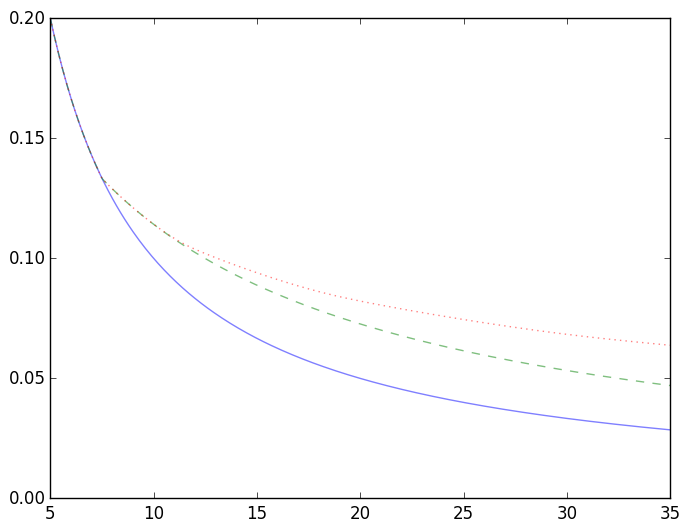

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc7c4acd550>

In [1]:
# ex. 6.3.13
using Roots: fzero
using Distributions
using PyPlot
using Interpolations

const alpha, a,c = 0.8, 5.0, 2.0 
const weights = a + c*rand(Beta(5,5),1000)

P(x) = 1.0/x
D(x) = 1.0/x

function T(p::Interpolations.GriddedInterpolation ,x::Float64)
    y = alpha*mean([p[z] for z in weights])
    if y<P(x)
        return P(x)
    else
        h(r) = alpha*mean([p[z+alpha*(x-D(r))] for z in weights])-r
        return fzero(h,P(x),y)
    end
end

function findp(p_start::Interpolations.GriddedInterpolation,tol::Float64=0.0001,maxrep::Int64=100)
    p = p_start
    rep = 1
    vals = Array(Float64,length(grid))
    while true 
        for (i,x) in enumerate(grid)
            vals[i] = T(p,x)
        end
        if maximum(abs(p[grid].-vals))<tol || rep>=maxrep
            return interpolate((grid,),vals,Gridded(Linear()))
        else
            rep += 1
            p = interpolate((grid,),vals,Gridded(Linear()))
        end
    end
end

const grid = a:0.1:35
const Pongrid = [P(x) for x in grid]
const pstart = interpolate((grid,),Pongrid,Gridded(Linear()))

pstar = findp(pstart)
TP1 = findp(pstart,0.0001,1)

plot(grid,Pongrid,"b-",alpha=0.5,label="P")
plot(grid,TP1[grid],"g--",alpha=0.5,label="TP")
plot(grid,pstar[grid],"r:",alpha=0.5,label="pstar")


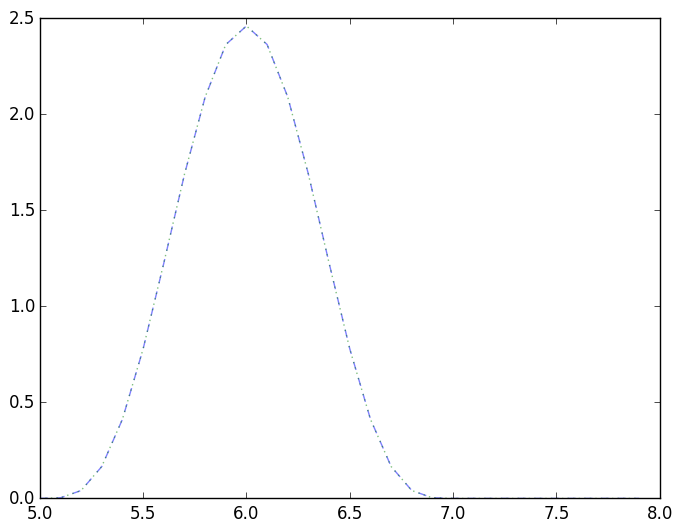

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc7c4471d90>

In [14]:
# ex 6.3.14 (requires 6.1.22 and 6.3.13)

d() = rand(Beta(5,5))
F(x,w) = alpha*(x-D(pstar[x]))+ a+c*w
p(x,y) = pdf(Beta(5,5),(y-alpha*(x-D(pstar[x]))-a)/c)

X = Array(Float64,1000)
srs = SRS(F,d,d())
for i in 1:1000
    srs.x = a+c*d()
    X[i] = sample_path(srs,50)[end]
end

density = lade(grid,p,vec(X))
plot(grid[1:30],density[1:30],"b--",alpha=0.5)
plot(grid[1:30],pdf(Beta(5,5),(grid[1:30].-a)./c),"g:",alpha=0.5)

In [12]:
(grid[1:30].-a)./c

0.0:0.05:1.45